In [1]:
# !git clone https://github.com/theschoolofai/YoloV3.git

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/data_science/computer_vision/session13_assignment_part2_yolo_ppe/YoloV3-master/data/customdata/images/ | wc -l

In [ ]:
!ls /content/drive/My\ Drive/data_science/computer_vision/session13_assignment_part2_yolo_ppe/YoloV3-master/data/customdata/labels/ | wc -l

3526


In [2]:
import time
import glob
import torch
import os
import PIL

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [ ]:
!ls

drive  sample_data


In [3]:
os.chdir("/content/drive/My Drive/computer_vision/YoloV3-master")

In [4]:
!ls

 cfg
 data
 detect.py
 final_result.mp4
 models.py
 old_session13_assignment_YoloV3PPEDetection.ipynb
 output
 __pycache__
 README.md
 results
 results.json
 results.png
 results.txt
 runs
 session13_assignment_YoloV3PPEDetection.ipynb
 source
 target
 test_batch0.png
 test.py
 ting
 train_batch0.png
 train.py
'ubdivisions=1'
 utils
 vim.exe.stackdump
 weights


In [ ]:
# !python train.py --data data/customdata/custom.data --batch 3 --cache --epochs 3 --nosave


In [ ]:
# os.path.dirname('./data/customdata/Images/')

In [ ]:
def are_files_exist(meta_data, files_location):
  not_found_files = []
  file_names = open(meta_data).readlines()
  for file_path in file_names:
    if not os.path.exists(file_path.strip()):
      not_found_files.append(file_path.strip())
  print(f'{len(not_found_files)} number of files not found')
  return not_found_files
     


In [ ]:
are_files_exist('./data/customdata/custom_test.txt', './data/images')

0 number of files not found


[]

In [ ]:
are_files_exist('./data/customdata/custom_train.txt', './data/images')

0 number of files not found


[]

In [ ]:
def write_image_shapes(image_paths_file, target_filepath):
  file_names = open(image_paths_file).readlines()
  with open(target_filepath, 'a') as file_handler:
    for image_path in file_names:
      im = PIL.Image.open(image_path.strip())
      img_width, img_height = [float(dim) for dim in im.size]
      file_handler.write(f'{img_width} {img_height}\n')
  print("Done")


In [ ]:
len(open('./data/customdata/custom_train.txt').readlines()), len(open('./data/customdata/custom_train.shapes').readlines())

(3203, 3203)

In [ ]:
len(open('./data/customdata/custom_test.txt').readlines()), len(open('./data/customdata/custom_test.shapes').readlines())

(318, 318)

In [ ]:
# write_image_shapes('./data/customdata/custom_train.txt', './data/customdata/custom_train.shapes')

In [ ]:
# write_image_shapes('./data/customdata/custom_test.txt', './data/customdata/custom_test.shapes')

In [6]:
# !python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 50 --weights='weights/yolov3-spp-ultralytics.pt'

In [ ]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --weights='weights/yolov3-spp-ultralytics.pt'

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-10-23 13:55:19.543926: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [27:58<00:00,  1.91it/s]
Caching images (1.8GB): 100% 3203/3203 [32:36<00:00,  1.64it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100

In [7]:
!python detect.py --source 'source/play_ffmpeg' --conf-thres 0.1 --output 'target/'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='target/', save_txt=False, source='source/play_ffmpeg', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/2688 source/play_ffmpeg/img001.jpg: 320x512 4 hardhats, 3 vests, 1 bootss, Done. (0.016s)
image 2/2688 source/play_ffmpeg/img002.jpg: 320x512 4 hardhats, 3 vests, 1 bootss, Done. (0.016s)
image 3/2688 source/play_ffmpeg/img003.jpg: 320x512 4 hardhats, 3 vests, 1 bootss, Done. (0.016s)
image 4/2688 source/play_ffmpeg/img004.jpg: 320x512 4 hardhats, 3 vests, 1 bootss, Done. (0.016s)
image 5/2688 source/play_ffmpeg/img005.jpg: 320x512 4 hardhats, 3 vests, 1 bootss, Done. (0.016s)
image 6/2688 source/play_ffmp

In [8]:
!ls target/ | wc -l

2688


In [10]:
!ffmpeg -framerate 25 -i target/img%03d.jpg -r 25 -y results/out_video.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

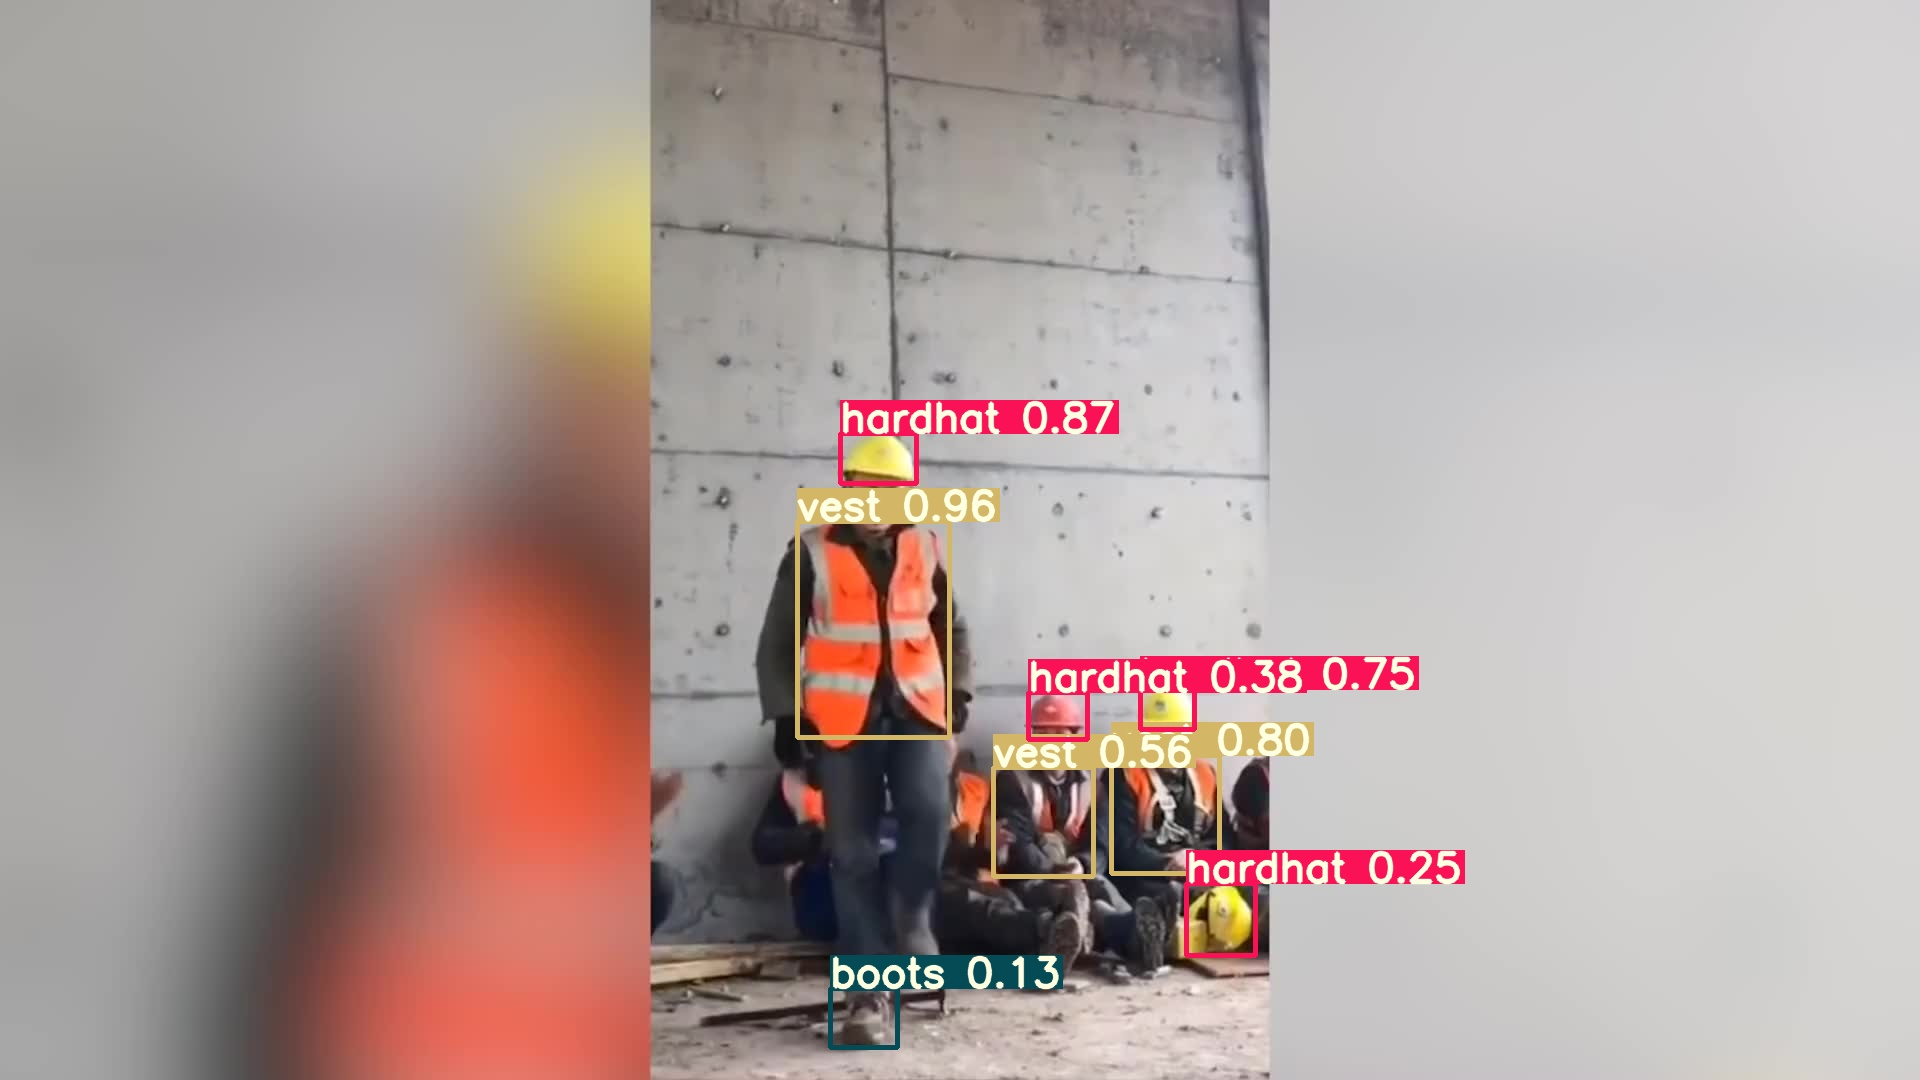

In [5]:
Image(filename='target/img001.jpg', width=600)

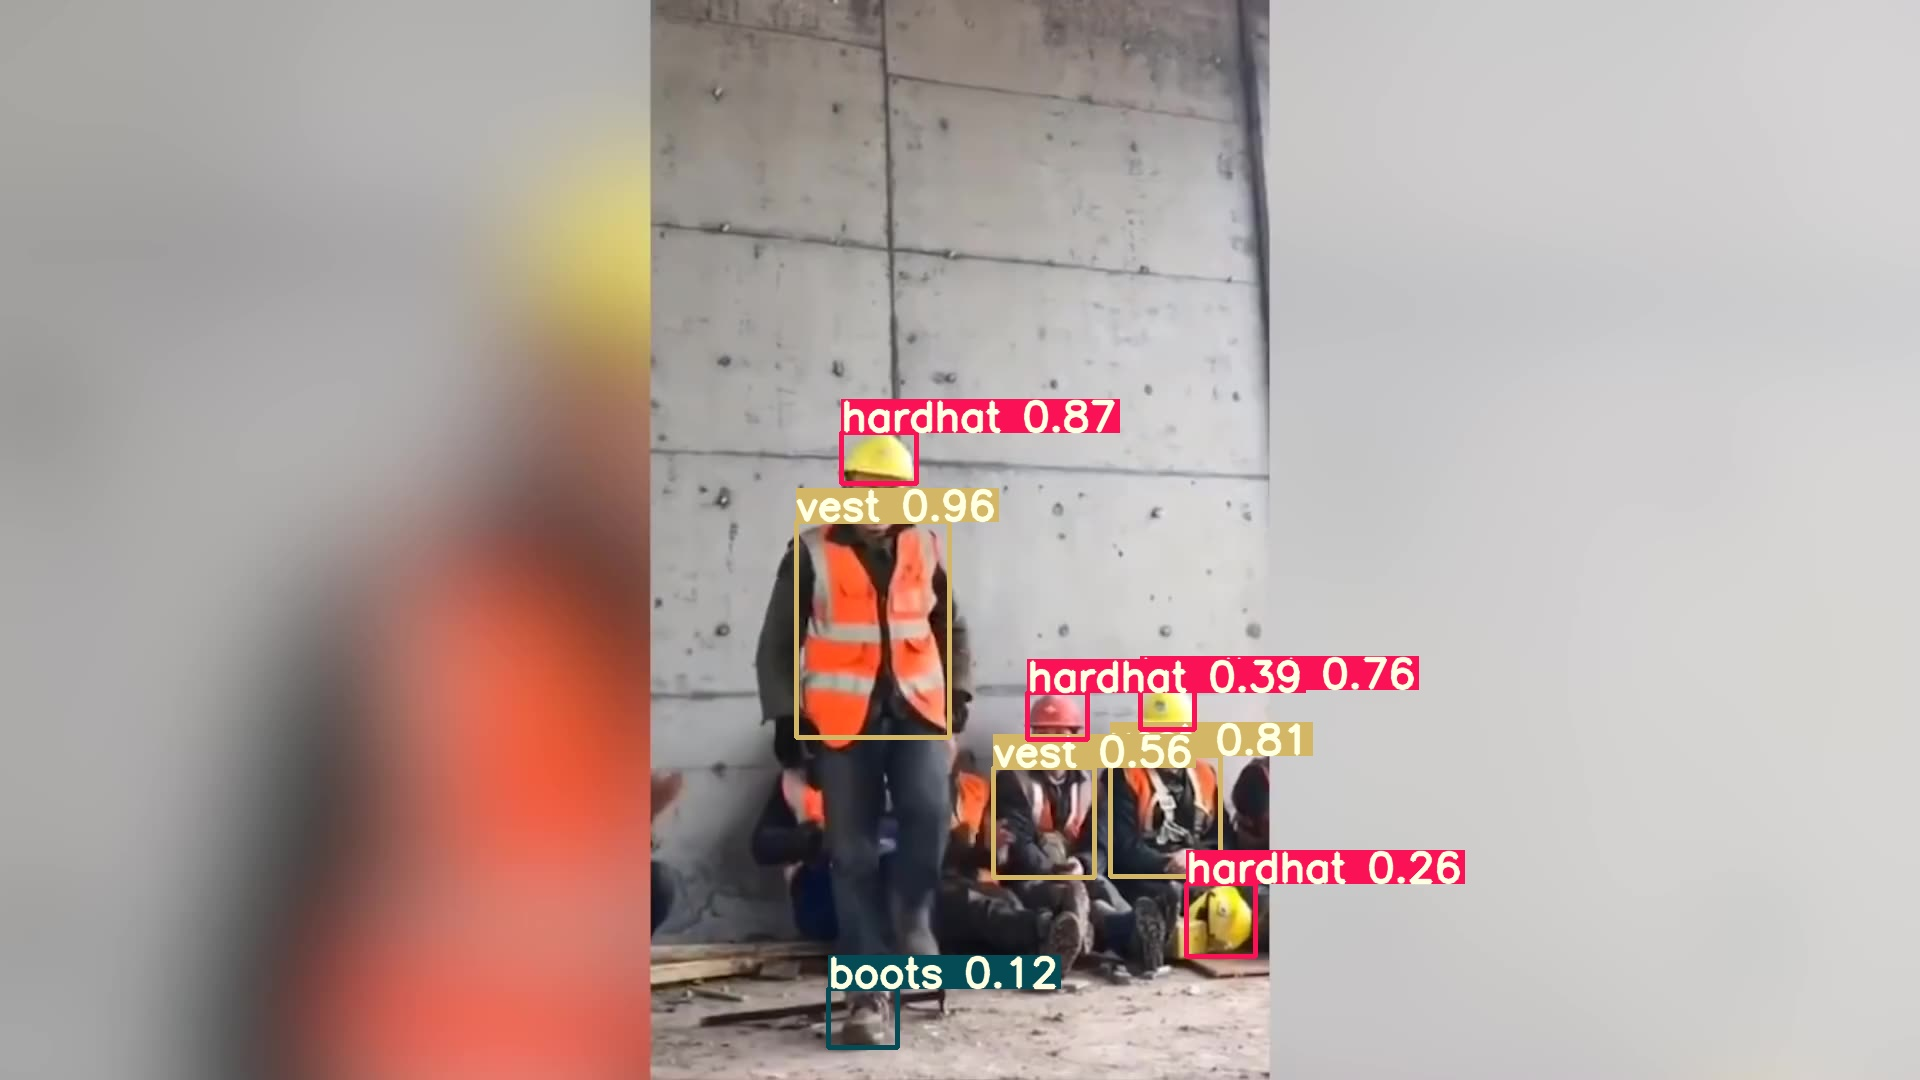

In [6]:
Image(filename='target/img002.jpg', width=600)

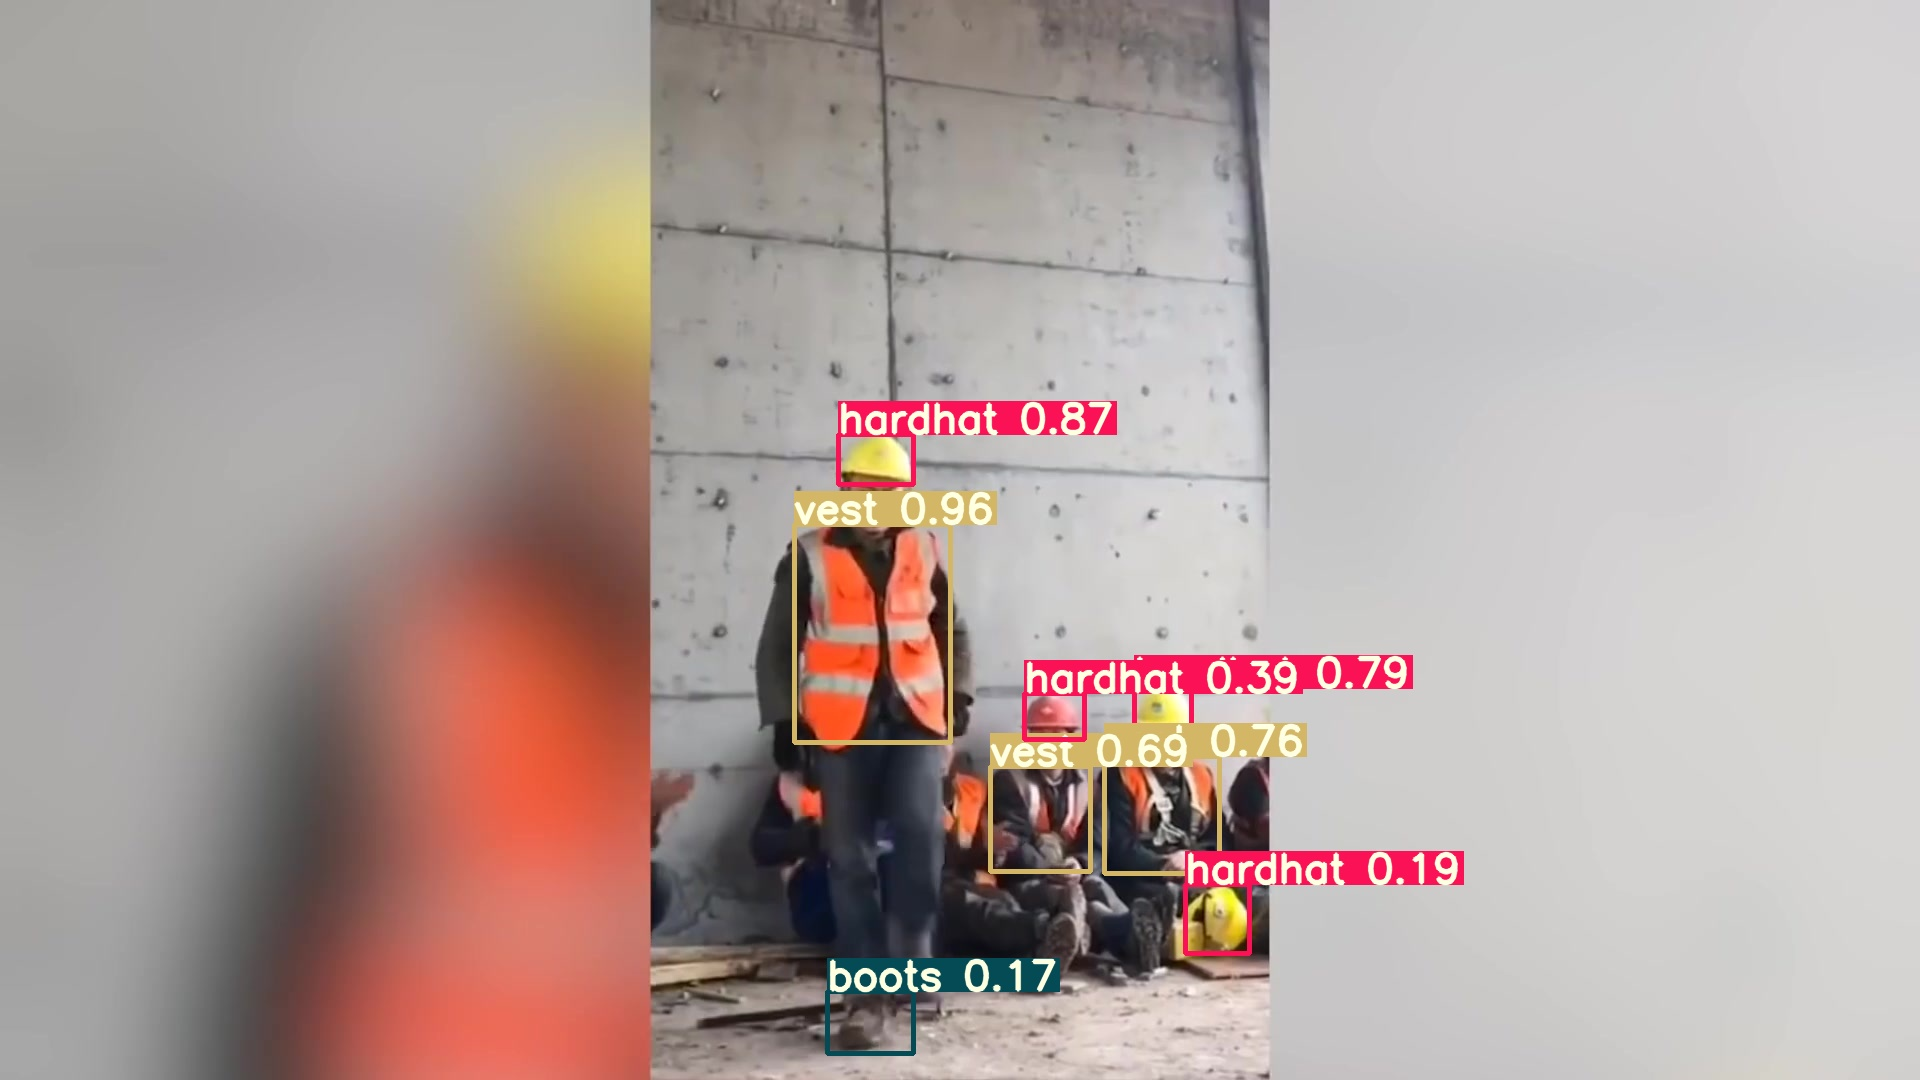

In [7]:
Image(filename='target/img003.jpg', width=600)

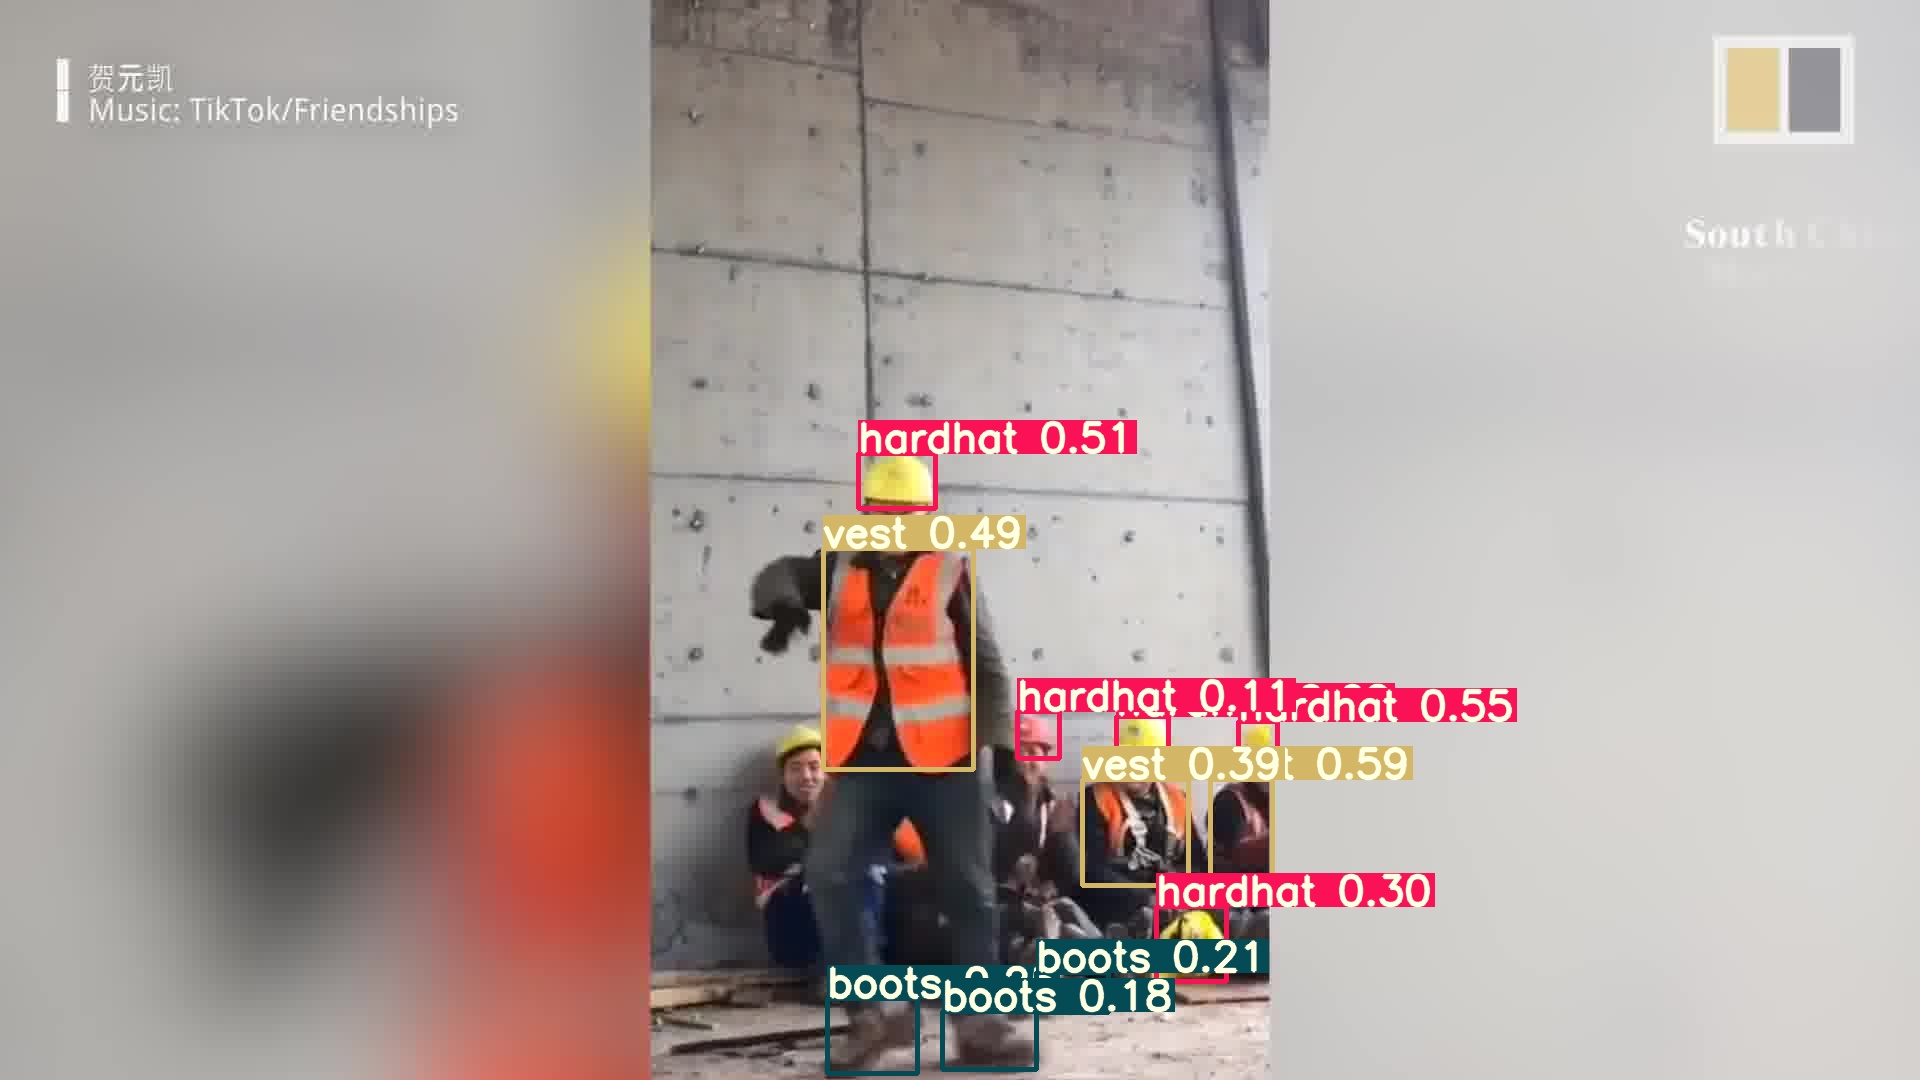

In [8]:
Image(filename='target/img020.jpg', width=600)